l 44 r 30


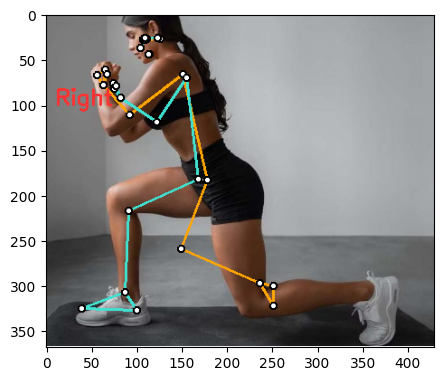

In [6]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

from ai_trainer.models import BlazePoseModel
from ai_trainer.drawing import draw_pose, draw_text
from ai_trainer.feedback.lunges import give_feedback

BLAZEPOSE_MODEL_PATH = "./models/blazepose_full.onnx"
blazepose_model = BlazePoseModel(model_path=BLAZEPOSE_MODEL_PATH)

IMAGE_PATH = "./assets/8.png"  # change if needed

# read image
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# copy image to plot on it
plot_image = image.copy()
img_h, img_w = image.shape[:2]
# print(img_h, img_w)

kps = blazepose_model.predict([image])[0]  # batch size is 1
# print(kps)
probs = kps.T[3]

if not all(probs<0):
    # denormalize keypoints:
    x, y, z = kps.T[:3]
    # x_img = x * img_w
    # y_img = y * img_h
    pose_3d = np.column_stack((x, y, z))
    pose_2d = np.column_stack((x, y))
    
    # plot keypoints on image
    sample = draw_pose(
        image=plot_image,
        keypoints=pose_2d,
        disposition="mediapipe", # blazepose keypoints are in mediapipe format
        thickness=2,
    )

    feedback, possible_corrections = give_feedback(pose_3d)
    number_corrections = len(list(feedback.keys())[1::])

    y_text_pos = 0
    for correction in possible_corrections:
        y_text_pos+=25
        if correction in list(feedback.keys()):
            sample = draw_text(
                image=sample,
                text=feedback[correction],
                origin=(10, y_text_pos),
                font_scale=0.8,
                color=(250, 50, 50),
                thickness=2,
            )
    
plt.figure(figsize=(5, 5))
plt.imshow(plot_image)